# **K Means Clustering with Optimal K determination**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris # dataset
from sklearn.cluster import KMeans # model
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import (
    silhouette_score,           # Measures how close samples are within the same cluster
    calinski_harabasz_score,     # Ratio of between-cluster dispersion to within-cluster dispersion
    davies_bouldin_score         # Lower is better, measures average similarity between clusters
)

# Import PCA for reducing data to 2D for easy visualization
from sklearn.decomposition import PCA

In [2]:
data = load_iris()
X = data.data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

**Optimal K Determination**

In [ ]:
# Initialize lists to store evaluation metrics
inertia = []      # Will store the sum of squared distances to closest cluster center (for elbow method)
sil_scores = []   # Will store silhouette scores (for quality of clustering)

# Define the range of 'k' values to test (number of clusters from 2 to 10)
k_range = range(2, 11)

# Loop through each value of k
for k in k_range:
    # Initialize KMeans with k clusters
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    
    # Fit the model to the scaled data
    kmeans.fit(X_scaled)
    
    # Save the inertia (sum of squared distances) — lower is better
    inertia.append(kmeans.inertia_)
    
    # Save the silhouette score — higher is better
    sil_scores.append(silhouette_score(X_scaled, kmeans.labels_))

**Inertia and Silhouette Plots**

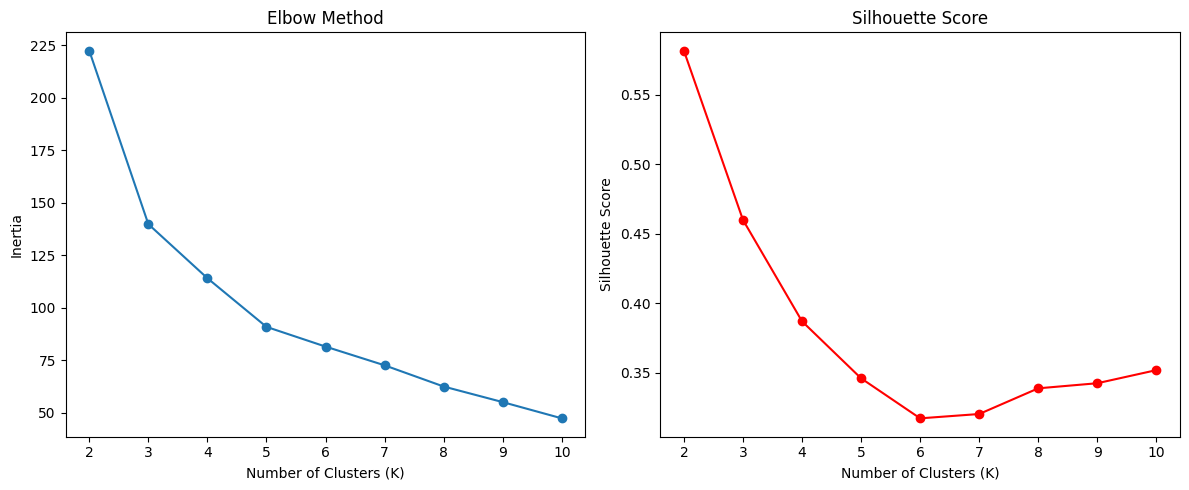

In [4]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(k_range, inertia, marker='o')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia")
plt.title("Elbow Method")

plt.subplot(1, 2, 2)
plt.plot(k_range, sil_scores, marker='o', color='r')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score")
plt.tight_layout()
plt.show()

**Training Model on Optimal K (based on highest Silhouette Score)**

In [5]:
# Optimal K (based on highest Silhouette Score)
optimal_k = k_range[np.argmax(sil_scores)]
print(f"\nOptimal number of clusters (based on Silhouette Score): {optimal_k}")

# Training Final KMeans Model
final_kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
final_labels = final_kmeans.fit_predict(X_scaled)


Optimal number of clusters (based on Silhouette Score): 2


**Cluster Quality**

In [ ]:
# Calculate clustering quality metrics based on final model labels

# Silhouette Score: measures how similar each point is to its own cluster vs. other clusters
silhouette_avg = silhouette_score(X_scaled, final_labels)

# Calinski-Harabasz Index: ratio of between-cluster dispersion to within-cluster dispersion (higher = better)
calinski_harabasz = calinski_harabasz_score(X_scaled, final_labels)

# Davies-Bouldin Index: average 'similarity' between clusters (lower = better)
davies_bouldin = davies_bouldin_score(X_scaled, final_labels)

# Print the results
print("\n--- Cluster Quality Metrics ---")
print(f"Silhouette Score: {silhouette_avg:.4f}")
print(f"Calinski-Harabasz Index: {calinski_harabasz:.4f}")
print(f"Davies-Bouldin Index: {davies_bouldin:.4f}")


--- Cluster Quality Metrics ---
Silhouette Score: 0.5818
Calinski-Harabasz Index: 251.3493
Davies-Bouldin Index: 0.5933


**2D PCA Visualization of Clusters**

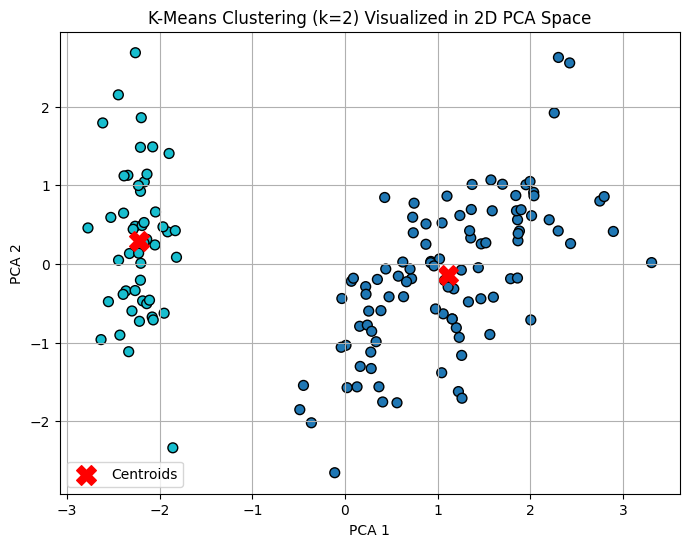

In [7]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=final_labels, cmap='tab10', s=50, edgecolor='k')
centers_pca = pca.transform(final_kmeans.cluster_centers_)
plt.scatter(centers_pca[:, 0], centers_pca[:, 1], c='red', marker='X', s=200, label='Centroids')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title(f'K-Means Clustering (k={optimal_k}) Visualized in 2D PCA Space')
plt.legend()
plt.grid(True)
plt.show()